<a href="https://www.kaggle.com/kalilurrahman/tps-oct-2021-eda-and-analysis?scriptVersionId=89684207" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🔥🔥TPS Oct 2021 - 🔥🔥EDA and Analysis 🔥🔥

# Biological Molecules response to Chemicals 
.         |  ..
:-------------------------:|:-------------------------:
![](https://miro.medium.com/max/1400/0*hQG_y2xkkj4cjexx)  |  ![DNA](https://upload.wikimedia.org/wikipedia/commons/1/16/DNA_orbit_animated.gif)
![Key Bio Proteins](https://upload.wikimedia.org/wikipedia/commons/d/d3/0322_DNA_Nucleotides.jpg)  | ![Meta Genomic Methods](https://upload.wikimedia.org/wikipedia/commons/4/47/Overview_of_metagenomic_methods.jpg)

> Chemical biology is a scientific discipline spanning the fields of chemistry and biology. The discipline involves the application of chemical techniques, analysis, and often small molecules produced through synthetic chemistry, to the study and manipulation of biological systems. In contrast to biochemistry, which involves the study of the chemistry of biomolecules and regulation of biochemical pathways within and between cells, chemical biology deals with chemistry applied to biology (synthesis of biomolecules, simulation of biological systems etc.).

## Excited? 


##### Some References on Biology and Chemistry correlation 
###### Thanks to Tensor Girl for posting on BMS competition
- [Deep learning and generative methods in cheminformatics and chemical biology: navigating small molecule space intelligently](https://portlandpress.com/biochemj/article/477/23/4559/227194/Deep-learning-and-generative-methods-in)
- [Learning Drug Functions from Chemical Structures with Convolutional Neural Networks and Random Forests](https://pubs.acs.org/doi/10.1021/acs.jcim.9b00236)
-[Deep Learning of Atomically Resolved Scanning Transmission Electron Microscopy Images: Chemical Identification and Tracking Local Transformations](https://www.osti.gov/servlets/purl/1427646)
-[Chemception: Deep Learning from 2D Chemical Structure Images](https://depth-first.com/articles/2019/02/04/chemception-deep-learning-from-2d-chemical-structure-images/)
-[Molecular Structure Extraction From Documents Using Deep Learning](https://arxiv.org/ftp/arxiv/papers/1802/1802.04903.pdf)
-[CheMixNet: Mixed DNN Architectures for Predicting Chemical Properties using Multiple Molecular Representations](http://cucis.eecs.northwestern.edu/publications/pdf/PJA18.pdf)

### One more source to check for good info on molecules is [PubChem](https://pubchem.ncbi.nlm.nih.gov/)
> PubChem is the world's largest collection of freely accessible chemical information. Search chemicals by name, molecular formula, structure, and other identifiers. Find chemical and physical properties, biological activities, safety and toxicity information, patents, literature citations and more.

### Let us check the analysis

# Table of Contents
<a id="table-of-contents"></a>
- [1 Introduction](#1)
- [2 Preparations](#2)
- [3 Datasets Overview](#3)
    - [3.1 Train dataset](#3.1)
    - [3.2 Test dataset](#3.2)
    - [3.3 Submission](#3.3)
- [4 Features](#4)
    - [4.1 Missing values](#4.1)
       - [4.1.1 Preparation](#4.1.1)
       - [4.1.2 Individual features](#4.1.2)
       - [4.1.3 Individual rows](#4.1.3)
       - [4.1.3 Dealing with missing values (reference)](#4.1.4)
    - [4.2 Distribution](#4.2)

[back to top](#table-of-contents)
<a id="1"></a>
# 1 Introduction

Kaggle competitions are incredibly fun and rewarding, but they can also be intimidating for people who are relatively new in their data science journey. In the past, Kaggle have launched many Playground competitions that are more approachable than Featured competition, and thus more beginner-friendly.

The goal of these competitions is to provide a fun, but less challenging, tabular dataset. These competitions will be great for people looking for something in between the Titanic Getting Started competition and a Featured competition.

The dataset is used for this competition is synthetic, but based on a real dataset and generated using a [CTGAN](https://github.com/sdv-dev/CTGAN). The original dataset deals with *predicting the **biological response of molecules** given various chemical properties*. Although the features are anonymized, they have properties relating to real-world features.

This competition will asked to predict whether a customer made a claim upon an insurance policy. The ground truth claim is binary valued, but a prediction may be any number from 0.0 to 1.0, representing the probability of a claim. The features in this dataset have been anonymized and may contain missing values.

Submissions are evaluated on **area under the ROC curve** between the predicted probability and the observed target.

In [1]:

# import packages
import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns

# setting up options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

# import datasets
train_file = '../input/tabular-playground-series-oct-2021/train.csv'
test_file = '../input/tabular-playground-series-oct-2021/test.csv'
sub_file = '../input/tabular-playground-series-oct-2021/sample_submission.csv'

In [2]:
train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)
submission = pd.read_csv(sub_file)

[back to top](#table-of-contents)
<a id="2"></a>
# 2 Preparations
Preparing packages and data that will be used in the analysis process. Packages that will be loaded are mainly for data manipulation, data visualization and modeling. There are 2 datasets that are used in the analysis, they are train and test dataset. The main use of train dataset is to train models and use it to predict test dataset. While sample submission file is used to informed participants on the expected submission for the competition. *(to see the details, please expand)*

In [3]:
train_df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,target
0,0,0.205979,0.410993,0.176775,0.223581,0.423543,0.476140,0.413590,0.612021,0.534873,0.147295,0.026177,0.106613,0.200924,0.713191,0.155750,0.557335,0.341702,0.285720,0.230396,0.203957,0.509588,0.706972,1,0.007793,0.247765,0.263750,0.259555,0.231730,0.138379,0.197824,0.054392,0.194153,0.281500,0.034818,0.025334,0.114432,0.139203,0.246157,0.251371,0.701423,0.301182,0.193924,0.267497,0,0.193430,0.238630,0.154770,0.249857,0.210685,0.406662,0.214810,0.258668,0.377518,0.192042,0.340855,0.199660,0.264074,0.205550,0.075109,0.205688,0.178962,0.245008,0.519336,0.306419,0.127139,0.367479,0.236380,0.195694,0.013195,0.199588,0.283367,0.168824,0.004855,0.117723,0.257688,0.197262,0.211452,0.372637,0.198157,0.689970,0.449955,0.713110,0.212041,0.183619,0.288667,0.648678,0.600398,0.223267,0.590163,0.248847,0.795641,0.139932,0.618696,0.639142,0.008549,0.559151,0.573640,0.138808,0.499156,0.112203,0.181498,0.165887,0.093171,0.106952,0.127861,0.250924,0.501673,0.036740,0.111361,0.075918,0.019444,0.250760,0.465093,0.087502,0.004185,0.195936,0.166389,0.171328,0.146014,0.199232,0.133999,0.168191,0.010242,0.294490,0.012977,0.003969,0.013739,0.040076,0.170711,0.250246,0.195538,0.708556,0.448925,0.550352,0.217984,0.751629,0.822459,0.186298,0.024197,0.044097,0.078943,0.181147,0.022591,0.576712,0.406843,0.510578,0.799434,0.651125,0.460708,0.636714,0.350704,0.872989,0.007751,0.017103,0.019875,0.203042,0.864594,0.595877,0.542969,0.990250,0.020373,0.006238,0.011040,0.006019,0.407014,0.080140,0.013502,0.144265,0.007229,0.003256,0.014556,0.123806,0.133871,0.011531,0.010250,0.253750,0.090162,0.147857,0.303087,0.112764,0.104344,0.168583,0.011342,0.239028,0.008018,0.167653,0.217342,0.184178,0.179060,0.078009,0.135768,0.006534,0.009832,0.013317,0.390079,0.004801,0.056600,0.114139,0.012599,0.014818,0.446073,0.216079,0.152113,0.111237,0.170896,0.190477,0.011936,0.005227,0.429740,0.013060,0.199369,0.258410,0.208863,0.129545,0.006978,0.012948,0.049466,0.008804,0.114205,0.119683,0.191210,0.169976,0.188199,0.355674,0.013164,0.304878,0.007213,0.011277,0.083186,0.010624,0.031199,0.200306,0.195791,0.203470,0.036314,0.157711,0.199117,0.007444,0.189048,0.202540,0.273267,0.167211,1,0,1,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1
1,1,0.181004,0.473119,0.011734,0.213657,0.619678,0.441593,0.230407,0.686013,0.281971,0.238509,0.493411,0.107277,0.231828,0.457150,0.395200,0.617088,0.459358,0.209225,0.201098,0.199383,0.366578,0.585788,1,0.285311,0.400367,0.162493,0.249365,0.141160,0.133688,0.247906,0.139251,0.216444,0.109674,0.033018,0.017458,0.189336,0.168785,0.184251,0.202753,0.218451,0.324364,0.255499,0.287433,0,0.821982,0.284351,0.177537,0.207

[back to top](#table-of-contents)
<a id="3"></a>
# 3 Dataset Overview
The intend of the overview is to get a feel of the data and its structure in train, test and submission file. An overview on train and test datasets will include a quick analysis on missing values and basic statistics, while sample submission will be loaded to see the expected submission.

<a id="3.1"></a>
## 3.1 Train dataset
As stated before, train dataset is mainly used to train predictive model as there is an available target variable in this set. This dataset is also used to explore more on the data itself including find a relation between each predictors and the target variable.

**Observations:**
- `target` column is the target variable which is only available in the `train` dataset.
- There are `287` columns: `285` are features, `1` target variable `target` and `1` column of `id`.
- `train` dataset contain `1,000,000`  data, and the test consists of 500000 data.
- f0~f241 : continuous feature (242)
- f242 ~ f284 : binary feature (43)

### 3.1.1 Quick view
Below is the first 5 rows of train dataset:

In [4]:
print(f'Number of rows: {train_df.shape[0]}')
print(f'Number of columns: {train_df.shape[1]}')
print(f'No of missing values: {sum(train_df.isna().sum())}')

Number of rows: 1000000
Number of columns: 287
No of missing values: 0


### 3.1.2 Basic statistics
Below is the basic statistics for each variables which contain information on `count`, `mean`, `standard deviation`, `minimum`, `1st quartile`, `median`, `3rd quartile` and `maximum`.

In [5]:
train_df.describe()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284,target
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000

In [6]:
test_df.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f206,f207,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f276,f277,f278,f279,f280,f281,f282,f283,f284
0,1000000,0.178216,0.435617,0.010230,0.202074,0.390170,0.324221,0.221722,0.738894,0.582588,0.343770,0.028081,0.102890,0.263804,0.607342,0.172180,0.491036,0.326189,0.252032,0.222362,0.242405,0.471047,0.723153,0,0.151190,0.226410,0.305478,0.269863,0.139583,0.141646,0.200469,0.059474,0.283620,0.244343,0.033877,0.010561,0.112109,0.193434,0.182685,0.188303,0.419009,0.285411,0.180912,0.209717,1,0.140470,0.241561,0.316918,0.215179,0.213195,0.246878,0.192177,0.178394,0.214424,0.182717,0.194714,0.174153,0.365876,0.169485,0.128054,0.250435,0.139776,0.268529,0.527465,0.338823,0.170422,0.163623,0.359837,0.149427,0.015599,0.162641,0.475365,0.218262,0.007640,0.113426,0.232048,0.196523,0.186975,0.323980,0.192931,0.634668,0.443279,0.687564,0.303014,0.209283,0.018238,0.581245,0.635117,0.164413,0.228907,0.489238,0.510888,0.651099,0.526209,0.542099,0.012908,0.150668,0.161797,0.271195,0.004828,0.113824,0.258710,0.283913,0.303373,0.105966,0.016048,0.030098,0.128585,0.038285,0.111251,0.154306,0.018076,0.209476,0.254074,0.084567,0.014150,0.350489,0.165743,0.169610,0.084159,0.187838,0.219015,0.168399,0.004914,0.019981,0.010063,0.004237,0.010785,0.043399,0.171178,0.291667,0.214174,0.709415,0.426936,0.576867,0.223034,0.719360,0.820207,0.185445,0.855089,0.533881,0.079138,0.625610,0.018667,0.623520,0.022663,0.365148,0.747389,0.558199,0.490998,0.729365,0.353262,0.875225,0.760399,0.414503,0.012137,0.203014,0.328036,0.548862,0.009272,0.997720,0.022934,0.004282,0.015800,0.896812,0.091122,0.079299,0.006342,0.145140,0.001878,0.002938,0.017270,0.235999,0.135111,0.635472,0.012371,0.016624,0.089912,0.105659,0.148205,0.002893,0.149323,0.169143,0.014200,0.195182,0.006760,0.250901,0.233035,0.095484,0.010419,0.078858,0.137215,0.009723,0.010456,0.008114,0.011521,0.012774,0.057635,0.401204,0.009198,0.008360,0.009917,0.162079,0.155008,0.059201,0.316937,0.095652,0.012927,0.117827,0.019541,0.015887,0.199542,0.317563,0.115914,0.162535,0.374658,0.013940,0.053678,0.004083,0.112384,0.011045,0.156239,0.154513,0.375630,0.006171,0.378678,0.006598,0.012125,0.004668,0.081293,0.010070,0.026948,0.433257,0.195952,0.227176,0.092359,0.152883,0.266000,0.006716,0.196959,0.022934,0.199017,0.150822,0,0,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,1,1,1,0
1,1000001,0.181250,0.476455,0.022413,0.283146,0.598020,0.349508,0.283467,0.721575,0.268990,0.208373,0.278440,0.107586,0.402494,0.594466,0.193365,0.592103,0.345882,0.257781,0.201138,0.215895,0.449694,0.627330,1,0.133139,0.438526,0.215876,0.242926,0.156744,0.143899,0.697532,0.210877,0.268969,0.209255,0.040739,0.014843,0.113464,0.187680,0.206614,0.389319,0.535426,0.469284,0.525111,0.277706,0,0.816747,0.178317,0.255873,0.

[back to top](#table-of-contents)
<a id="3.3"></a>
## 3.3 Submission
The submission file is expected to have an `id` and `target` columns.

Below is the first 5 rows of submission file:

In [7]:
submission.head()

,id,target
0,1000000,0.500000
1,1000001,0.500000
2,1000002,0.500000
3,1000003,0.500000
4,1000004,0.500000


[back to top](#table-of-contents)
<a id="4"></a>
# 4 Features
Number of features available to be used to create a prediction model are `285`.

<a id="4.1"></a>
## 4.1 Missing values
Counting number of missing value and it's relative with their respective observations between train & test dataset.

<a id="4.1.1"></a>
### 4.1.1 Preparation
Prepare train and test dataset for data analysis and visualization. *(to see the details, please expand)*

In [8]:
train_df.loc[:, 'f0':'f284'].describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Greens')\
                            .background_gradient(subset=['25%'], cmap='Spectral')\
                            .background_gradient(subset=['50%'], cmap='seismic')\
                            .background_gradient(subset=['75%'], cmap='viridis')\
                            .background_gradient(subset=['mean'], cmap='cubehelix')\
                            .background_gradient(subset=['min'], cmap='Reds')\
                            .background_gradient(subset=['max'], cmap='Blues')


,count,mean,std,min,25%,50%,75%,max
f0,1000000.000000,0.214334,0.053320,0.041790,0.181676,0.204498,0.229684,1.000000
f1,1000000.000000,0.460218,0.101316,0.022016,0.389215,0.453893,0.526023,0.959019
f2,1000000.000000,0.129253,0.120805,0.000381,0.017692,0.095496,0.177717,0.994818
f3,1000000.000000,0.277598,0.063163,0.000000,0.235342,0.264669,0.305837,0.979797
f4,1000000.000000,0.580710,0.115338,0.000000,0.497938,0.565059,0.657024,1.000000
f5,1000000.000000,0.416619,0.058231,0.000959,0.374390,0.414009,0.458360,0.907889
f6,1000000.000000,0.386532,0.133457,0.000592,0.317815,0.420260,0.477140,0.972601
f7,1000000.000000,0.654858,0.065158,0.017994,0.615372,0.648562,0.692666,0.986195
f8,1000000.000000,0.462256,0.129439,0.000990,0.363753,0.475701,0.561372,0.986118
f9,1000000.000000,0.258031,0.119081,0.051183,0.164559,0.227714,0.300988,0.980994


## 4.1.2 Memory Reduction

Let us use datatable to reduce the memory

##### Source Credit: https://towardsdatascience.com/how-to-work-with-million-row-datasets-like-a-pro-76fb5c381cdd

### Missing Data Analysis 

In [9]:
missing_train_df = pd.DataFrame(train_df.isna().sum())
missing_train_df = missing_train_df.drop(['id', 'target']).reset_index()
missing_train_df.columns = ['feature', 'count']

missing_train_percent_df = missing_train_df.copy()
missing_train_percent_df['count'] = missing_train_df['count']/train_df.shape[0]

missing_test_df = pd.DataFrame(test_df.isna().sum())
missing_test_df = missing_test_df.drop(['id']).reset_index()
missing_test_df.columns = ['feature', 'count']

missing_test_percent_df = missing_test_df.copy()
missing_test_percent_df['count'] = missing_test_df['count']/test_df.shape[0]

features = [feature for feature in train_df.columns if feature not in ['id', 'target']]
missing_train_row = train_df[features].isna().sum(axis=1)
missing_train_row = pd.DataFrame(missing_train_row.value_counts()/train_df.shape[0]).reset_index()
missing_train_row.columns = ['no', 'count']

missing_test_row = test_df[features].isna().sum(axis=1)
missing_test_row = pd.DataFrame(missing_test_row.value_counts()/test_df.shape[0]).reset_index()
missing_test_row.columns = ['no', 'count']

In [10]:
cat_features =[]
num_features =[]

for col in train_df.columns:
    if train_df[col].dtype=='float64':
        num_features.append(col)
    else:
        cat_features.append(col)
print('Catagoric features: ', cat_features)
display(len(cat_features))
print('Numerical features: ', num_features)
display(len(num_features))

Catagoric features:  ['id', 'f22', 'f43', 'f242', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f252', 'f253', 'f254', 'f255', 'f256', 'f257', 'f258', 'f259', 'f260', 'f261', 'f262', 'f263', 'f264', 'f265', 'f266', 'f267', 'f268', 'f269', 'f270', 'f271', 'f272', 'f273', 'f274', 'f275', 'f276', 'f277', 'f278', 'f279', 'f280', 'f281', 'f282', 'f283', 'f284', 'target']


47

Numerical features:  ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137'

240

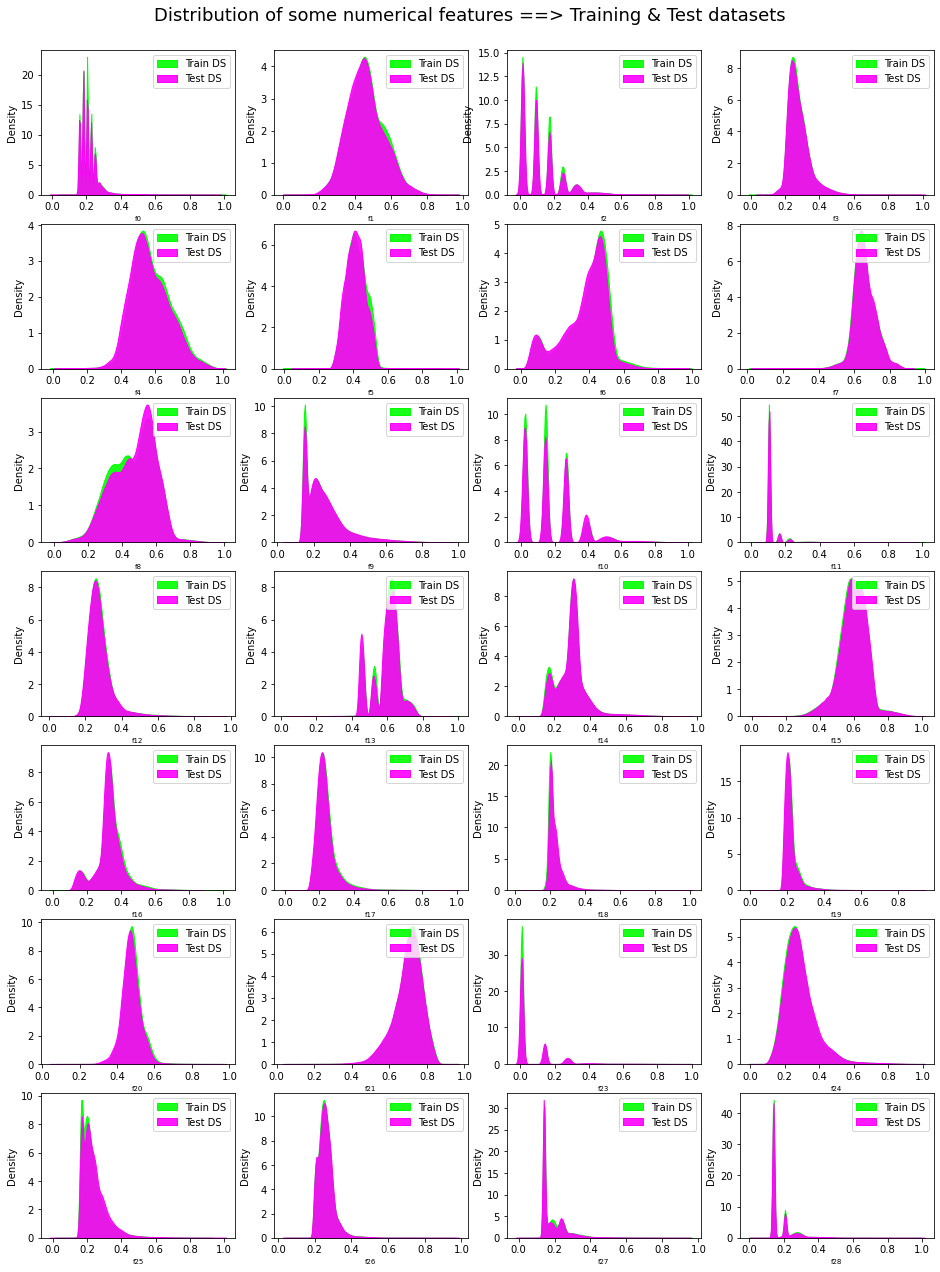

In [11]:
L = len(num_features[175:202])
nrow= 7
ncol= 4

remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol,figsize=(16, 20))
fig.subplots_adjust(top=0.95)
i = 1
for feature in num_features[0:28]:
    plt.subplot(nrow, ncol, i)
    ax = sns.kdeplot(train_df[feature], shade=True,  color='lime',  alpha=0.9, label='Train DS')
    ax = sns.kdeplot(test_df[feature], shade=True, color='fuchsia',  alpha=0.9, label='Test DS')
    plt.xlabel(feature, fontsize=7)
    plt.legend()
    i += 1
plt.suptitle('Distribution of some numerical features ==> Training & Test datasets ', fontsize=18)
plt.show()

<a id="4.1.2"></a>
### 4.1.2 Individual features
Count how many missing values in each features on `train` and `test` dataset to see if there any similiarity between them.

**Observations:**
- Every features in `train` and `test` dataset has a missing value of around `0.0%`.


## 4.1.3 - Analysis using Autoviz

In [12]:
#!pip install sweetviz autoviz xlrd

In [13]:
'''
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df = AV.AutoViz(train_file, depVar='target',verbose = 1, 
                lowess = False, chart_format ='png', 
                max_rows_analyzed = 150000)
'''

"\nfrom autoviz.AutoViz_Class import AutoViz_Class\nAV = AutoViz_Class()\ndf = AV.AutoViz(train_file, depVar='target',verbose = 1, \n                lowess = False, chart_format ='png', \n                max_rows_analyzed = 150000)\n"

#More to come! Thanks to the notebook outline from TPS SEP 2021 from Sharito Cope

# 5 - Simple LGBM model for evaluation

In [14]:
#test_df = dt.fread(test_file).to_pandas()
#train_df = dt.fread(train_file).to_pandas()

In [15]:
#Drop the Target Column
training_data = train_df.drop("target", axis=1)
#Save the value of Target for usage
training_label = train_df["target"].copy()

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
lgbm_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="most_frequent")),
    ('std_scaler', StandardScaler()),
])
training_prepared = lgbm_pipeline.fit_transform(training_data)

In [17]:
import lightgbm as lgb
lgbm_cls = lgb.LGBMClassifier()
lgbm_cls.fit(training_prepared,training_label)

LGBMClassifier()

In [18]:
testing_prepared = lgbm_pipeline.fit_transform(test_df)
test_predictions = lgbm_cls.predict(testing_prepared)

In [19]:
submission = pd.read_csv(sub_file)
submission['target'] = list(map(float, test_predictions))
submission.to_csv('submission.csv', index=False)